# Evaluation of Leaving Out Results

In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc("font", **{"family": "serif", "serif": ["Computer Modern"], "size": 18})
rc("text", usetex=True)

In [2]:
slurm_output_path = "../../../LABS/LOO/results/rmse_tables"
files = glob.glob(slurm_output_path + "/*")
extrapolation_predictions = glob.glob(slurm_output_path + "/extrapolation*")

pred_dfs = []
for file in extrapolation_predictions:
    df = pd.read_csv(file)
    pred_dfs.append(df)

loo_all_extrapolation_predictions = pd.concat(pred_dfs)

def get_metrics(n_loo: int, df = loo_all_extrapolation_predictions):
    metrics = {
        "emax": [],
        "rmse_eb": [],
        "rmse_rch": [],
        "mape_eb": [],
        "mape_rch": [],
    }
    _df = df[df["N"] == n_loo]
    emaxs = _df["emax"].unique()
    for emax in emaxs:
        emax_df = _df[_df["emax"] == emax]
        metrics["emax"].append(emax)
        preds_eb = emax_df["eb_pred"].values
        preds_rch = emax_df["r_pred"].values
        true_eb = emax_df["Energy bra"].values
        true_rch = emax_df["Rch"].values
        metrics["rmse_eb"].append(np.sqrt(np.mean((preds_eb - true_eb) ** 2)))
        metrics["rmse_rch"].append(np.sqrt(np.mean((preds_rch - true_rch) ** 2)))
        metrics["mape_eb"].append(np.mean(np.abs((preds_eb - true_eb) / true_eb)) * 100)
        metrics["mape_rch"].append(np.mean(np.abs((preds_rch - true_rch) / true_rch)) * 100)
    return pd.DataFrame(metrics)

all_ns = loo_all_extrapolation_predictions["N"].unique()
all_metrics_df = []
for n in sorted(all_ns):
    metrics = get_metrics(n)
    metrics["N"] = [n] * len(metrics)
    all_metrics_df.append(metrics)
all_metrics_df = pd.concat(all_metrics_df)



# Now for the eemax


In [3]:
slurm_output_path = "../../../LABS/EEXT/results/rmse_tables"
files = glob.glob(slurm_output_path + "/*")
extrapolation_predictions = glob.glob(slurm_output_path + "/extrapolation*")

pred_dfs = []
for file in extrapolation_predictions:
    df = pd.read_csv(file)
    pred_dfs.append(df)

eext_all_extrapolation_predictions = pd.concat(pred_dfs)

def get_metrics(n_eext: int, df = eext_all_extrapolation_predictions):
    metrics = {
        "emax": [],
        "rmse_eb": [],
        "rmse_rch": [],
        "mape_eb": [],
        "mape_rch": [],
    }
    _df = df[df["N"] == n_eext]
    emaxs = _df["emax"].unique()
    for emax in emaxs:
        emax_df = _df[_df["emax"] == emax]
        metrics["emax"].append(emax)
        preds_eb = emax_df["eb_pred"].values
        preds_rch = emax_df["r_pred"].values
        true_eb = emax_df["Energy bra"].values
        true_rch = emax_df["Rch"].values
        metrics["rmse_eb"].append(np.sqrt(np.mean((preds_eb - true_eb) ** 2)))
        metrics["rmse_rch"].append(np.sqrt(np.mean((preds_rch - true_rch) ** 2)))
        metrics["mape_eb"].append(np.mean(np.abs((preds_eb - true_eb) / true_eb)) * 100)
        metrics["mape_rch"].append(np.mean(np.abs((preds_rch - true_rch) / true_rch)) * 100)
    return pd.DataFrame(metrics)

all_ns = eext_all_extrapolation_predictions["N"].unique()
all_metrics_df = []
for n in sorted(all_ns):
    metrics = get_metrics(n)
    metrics["N"] = [n] * len(metrics)
    all_metrics_df.append(metrics)
all_metrics_df = pd.concat(all_metrics_df)

eext_all_extrapolation_predictions

,Sample,emax,Ct1S0pp,Ct1S0np,Ct1S0nn,Ct3S1,C1S0,C3P0,C1P1,C3P1,...,Zero,One,Two,Rch,Z,N,eb_pred,r_pred,eb_unc,r_unc
0,100524,6,-0.341431,-0.348897,-0.344299,-0.263014,2.654461,1.318910,0.004267,-1.193557,...,7.293555,0.063111,0.000000,2.834026,8,9,-103.296010,3.059674,2.444207,0.028975
1,100673,6,-0.329452,-0.326489,-0.326299,-0.251406,2.297465,0.720061,-0.020301,-0.878689,...,7.069211,0.050189,0.000000,2.791852,8,9,-100.438590,3.047162,2.609439,0.030839
2,101992,6,-0.342091,-0.348513,-0.344333,-0.264962,2.684727,0.960745,-0.020501,-0.971470,...,6.829813,0.031958,0.000000,2.745324,8,9,-107.660484,2.992526,2.563344,0.031448
3,111123,6,-0.339418,-0.338166,-0.337806,-0.236008,2.510679,0.430946,0.058425,-0.871905,...,7.504963,0.075923,0.000000,2.873312,8,9,-103.752945,3.103234,2.556991,0.030261
4,111185,6,-0.333585,-0.327803,-0.333017,-0.237843,2.343042,0.518180,0.004665,-1.048762,...,7.654916,0.087421,0.000000,2.901271,8,9,-90.072120,3.144193,2.641809,0.032048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,792924,10,-0.316576,-0.314932,-0.311511,-0.231397,2.105803,1.257190,0.053560,-1.039831,...,7.156774,0.238208,0.017183,2.836208,8,12,-108.851860,2.778860,1.956976,0.024948
881,812256,10,-0.324888,-0.333697,-0.330987,-0.244184,2.435655,0.803478,0.079041,-1.075269,...,6.899852,0.252437,0.004390,2.790805,8,12,-136.438280,2.757760,1.907719,0.024813
882,813018,10,-0.349136,-0.347827,-0.350922,-0.262250,2.688124,0.373394,0.005994,-1.076842,...,6.485898,0.237300,0.007000,2.713321,8,12,-144.046100,2.674159,1.931609,0.024568
883,813880,10,-0.321102,-0.318435,-0.319130,-0.236411,2.188739,0.561822,0.116028,-0.887760,...,7.500481,0.401148,0.003303,2.921788,8,12,-105.791435,2.867164,1.913514,0.023986


# Comparing the residuals

In [26]:
def compare_residuals_e(N):
    """
    For each fidelity, creates an historgram of the residuals of the predictions
    """
    filt_loo = loo_all_extrapolation_predictions[loo_all_extrapolation_predictions["N"] == N]
    filt_eext = eext_all_extrapolation_predictions[eext_all_extrapolation_predictions["N"] == N]
    fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]
    # For the energy
    # For the LOO
    for ii, emax in enumerate(sorted(filt_loo["emax"].unique())[1:]):
        filt_emax = filt_loo[filt_loo["emax"] == emax]
        perc_error = 100* (filt_emax["eb_pred"] - filt_emax["Energy bra"]) / filt_emax["Energy bra"]
        # axs[0].hist(perc_error, bins=100, alpha=0.5, label=f"emax={emax}", color=colors[ii])
        sns.histplot(perc_error, bins=50, alpha=0.3, ax=axs[0], kde=False, stat="density", color=colors[ii])
        sns.kdeplot(perc_error, ax=axs[0] , label=r"$e_{\max}$" + f" = {emax}", color=colors[ii])
        filt_emax = filt_eext[filt_eext["emax"] == emax]

        if len(filt_emax) == 0:
            continue
        perc_error = 100* (filt_emax["eb_pred"] - filt_emax["Energy bra"]) / filt_emax["Energy bra"]
        # axs[1].(perc_error, bins=100, alpha=0.5, label=f"EEXT emax={emax}", color=colors[ii],)
        sns.histplot(perc_error, bins=50, alpha=0.3, label=f"EEXT emax={emax}", color=colors[ii], ax=axs[1], kde=False, stat="density")
        sns.kdeplot(perc_error, color=colors[ii], ax=axs[1])
    # axs[0].set_title("LOO")
    # axs[1].set_title("EEXT")
    # say as a text box inside indicating LOO or EEXT
    axs[0].text(0.8, 0.3, "No data", fontsize=18, transform=axs[0].transAxes,
                ha="right", va="center",
                bbox=dict(facecolor="white", edgecolor="white", boxstyle="round,pad=0.5"))
    axs[1].text(0.8, 0.3, "Only \n" + r"$e_{\max}=$" + "4", fontsize=18, transform=axs[1].transAxes,
                ha="center", va="center",
                bbox=dict(facecolor="white", edgecolor="white", boxstyle="round,pad=0.5"))

    # Add a text box with the N value in the top left corner
    axs[0].text(0.08, 0.7, f"$^{{{N+8}}}$O", fontsize=18, transform=axs[0].transAxes,
                ha="left", va="top",
                bbox=dict(facecolor="white", ec="green", boxstyle="round,pad=0.5", alpha=0.7, lw=2))
    axs[0].legend()
    axs[0].vlines(0, 0, .50, color="black")
    axs[1].vlines(0, 0, .50, color="black")
    # axs[1].legend()
    axs[1].set_xlabel("Relative error in $E_B$ (\%)")
    axs[1].set_ylabel("Frequency")
    axs[0].set_ylabel("Frequency")

    # Reduce space between plots
    plt.subplots_adjust(hspace=0.05)
    plt.savefig(f"./relative_error_eb_N_{N}.pdf", bbox_inches="tight")


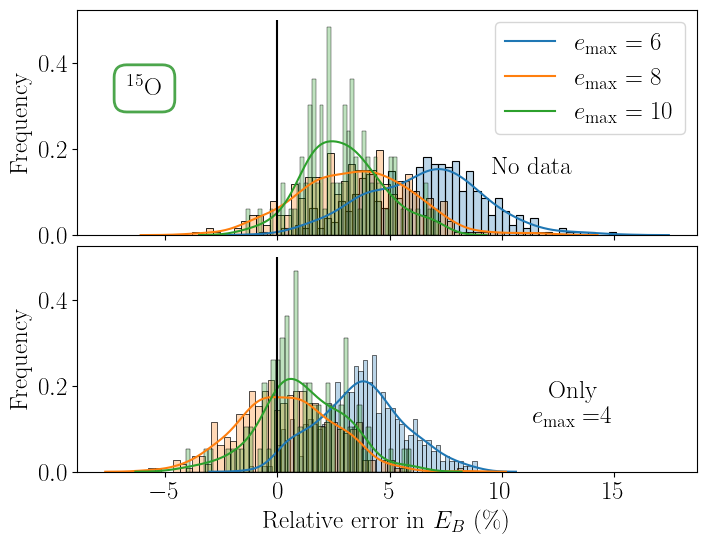

In [27]:
compare_residuals_e(7)